# Toyota Regression

## @author: KHAN MAHMUDUL HASAN

## Library Set Up

In [1]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split # split data into train and test data
import numpy as np

## Read Data

In [2]:
toyota_stock_data = pd.read_csv('toyota_stock.csv', encoding="utf-8")

## Reorder data from old to new date

In [3]:
toyota_stock_data = toyota_stock_data.sort_index(axis=0, ascending=False)
#
print(toyota_stock_data)
print(toyota_stock_data.info())

     Year  Month  Day  Begin  High   Low   End   Result  Adj_end
241  2020      4   20   6665  6725  6635  6635  4464000     6635
240  2020      4   21   6619  6654  6556  6560  4505600     6560
239  2020      4   22   6505  6529  6451  6500  4713600     6500
238  2020      4   23   6553  6573  6513  6570  3436200     6570
237  2020      4   24   6450  6570  6447  6543  4807000     6543
..    ...    ...  ...    ...   ...   ...   ...      ...      ...
4    2021      4   12   8448  8514  8435  8435  3945600     8435
3    2021      4   13   8452  8561  8448  8507  4691600     8507
2    2021      4   14   8467  8514  8416  8485  4412700     8485
1    2021      4   15   8550  8596  8521  8564  4361100     8564
0    2021      4   16   8575  8578  8490  8530  3332000     8530

[242 rows x 9 columns]
<class 'pandas.core.frame.DataFrame'>
Int64Index: 242 entries, 241 to 0
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Year     242 no

## Define training and and test data

In [4]:
train = (toyota_stock_data["Year"] <= 2020)
test = (toyota_stock_data["Year"] >= 2021)
interval = 6

## define sliding window (past 6 days) function

In [5]:
def make_data(data):
    x = [] # train data
    y = [] # train target data
    ends = list(data["End"])  # get Temperature data
    for i in range(len(ends)):  
        if i < interval: continue
        y.append(ends[i])
        xa = []
        for p in range(interval):
            d = i + p - interval
            xa.append(ends[d])
        x.append(xa)
    return (x, y)

## define training y and x variables

In [6]:
train_x, train_y = make_data(toyota_stock_data[train])  # define train data
test_x, test_y = make_data(toyota_stock_data[test])  # define test data

## perform linear regression 

In [7]:
lr = LinearRegression(normalize=True)
lr.fit(train_x, train_y) # fit learning
pre_y = lr.predict(test_x) # prediction for test data

/root/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


## The coefficients

In [8]:
print('Coefficients: \n', lr.coef_)

Coefficients: 
 [-0.03138655  0.00835596  0.19606607 -0.27779207 -0.01540245  1.09212934]


## Eaxplined variance score: 1 is perfect prediction

In [9]:
print('Variance score: \n', r2_score(test_y, pre_y))

Variance score: 
 0.8507037166265974


## plot test data Y and projected Y

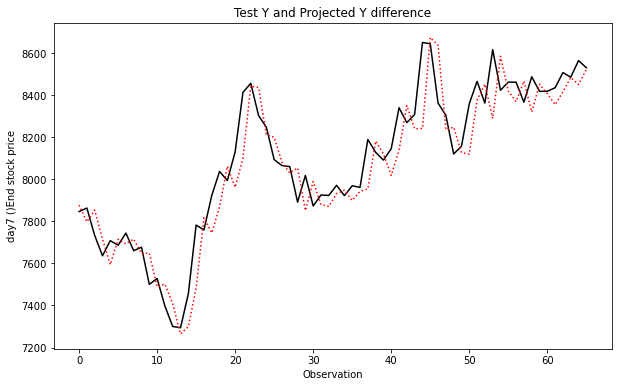

In [10]:
plt.figure(figsize=(10,6))  # set figure size 6 x 10
plt.plot(test_y, color = 'black', linestyle = 'solid')
plt.plot(pre_y, color = 'red', linestyle = 'dotted')
plt.title('Test Y and Projected Y difference')
plt.xlabel("Observation")
plt.ylabel("day7 ()End stock price")
plt.show()

## difference between prediction data and test data

In [11]:
print(pre_y-test_y)  # difference between prediction data and test data
diff_y=abs(pre_y-test_y)
print("average deviation=",sum(diff_y)/len(diff_y))  # average of differences
print("max deviation=",max(diff_y))  # max difference

[  31.0333952   -65.40250495  120.46410849   79.79985324 -114.06638164
   28.59785402  -51.49489324   55.54817908  -30.58612234  149.49461246
  -39.81141974  104.47756956  107.95735615  -29.66482053 -155.85552448
 -299.879724     58.44166779 -177.31371681 -170.21938803   67.90133818
 -168.94196698 -313.19297764  -12.63853726  132.59849846  -35.0785258
  106.14647504   15.85028658  -30.32219716  162.82062026 -166.75401524
  115.9193641   -45.82941079  -52.38304494  -39.44321458   25.50056457
  -70.19977644  -18.85556984 -234.94234924   52.98675537   29.37655332
 -127.0671327  -202.41589343   81.1921241   -68.27359843 -408.56345739
   29.91272693  275.27227156  -68.68774939  127.58791285  -30.67591488
 -239.39610463  -87.78201995   89.88429399 -326.81431793  161.41666858
  -42.35432824  -91.99695296  100.53723507 -167.51906402   33.43130485
  -11.21164951  -80.62042878  -91.92501258   -1.0893071  -114.32192717
   -8.20708933]
average deviation= 103.5749639375175
max deviation= 408.563457

## 2) SVM model

In [12]:
svr_lin = SVR(kernel='linear', C=100, gamma='auto')
svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
#
svrs = [ svr_lin, svr_rbf]
for svr in svrs:
    svr.fit(train_x, train_y)
   # Make predictions using the testing set
    pre_y = svr.predict(test_x)
   #
    print(svr)
   # Explained variance score: 1 is perfect prediction
    print('Variance score: \n', r2_score(test_y, pre_y))
   # check prediction result
   # print(diabetes_y_pred-y_test)  # difference between prediction data and test data
    diff=abs(pre_y - test_y)  # get absolute difference
    print("average deviation=",sum(diff)/len(diff))  # average of differences
    print("max deviation=",max(diff))  # max difference

SVR(C=100, gamma='auto', kernel='linear')
Variance score: 
 -105.74417128776831
average deviation= 2907.2502079425094
max deviation= 9089.493197669406
SVR(C=100, gamma=0.1)
Variance score: 
 -10.41608051747502
average deviation= 1122.1824242424202
max deviation= 1684.212727272724


## 3) Ramdom Forest Regression model

In [13]:
# Construct Random forest model
from sklearn.ensemble import RandomForestRegressor
#
rfr = RandomForestRegressor(n_estimators=100)
rfr.fit(train_x, train_y)
pre_y = rfr.predict(test_x)
# Explained variance score: 1 is perfect prediction
print('Variance score: \n', r2_score(test_y, pre_y))
# check prediction result
print(pre_y-test_y)  # difference between prediction data and test data
diff=abs(pre_y-test_y)  # get absolute difference
print("average deviation=",sum(diff)/len(diff))  # average of differences
print("max deviation=",max(diff))  # max difference

Variance score: 
 -0.5227057796298242
[  96.19   43.23  120.3   147.09   66.57  126.4   108.9   214.63  192.39
  394.37  182.61  293.55  111.19   28.19 -115.76 -391.04   24.06  -79.09
  -85.53  -32.08 -174.28 -534.66 -643.75 -489.17 -434.09 -280.09 -252.09
 -247.09  -78.09 -206.21  -49.45 -116.63  -86.11 -125.31  -66.66 -106.51
 -117.   -355.12 -287.25 -267.63 -326.52 -526.87 -456.09 -495.09 -837.09
 -831.09 -549.09 -491.09 -307.09 -344.09 -546.09 -652.09 -549.09 -803.09
 -610.09 -649.09 -648.09 -553.09 -674.09 -605.09 -605.09 -622.09 -694.09
 -672.09 -751.09 -717.09]
average deviation= 352.81681818181823
max deviation= 837.0900000000001


## relative importance

In [14]:
importances = pd.DataFrame({'feature':train_x.columns,'importance':np.round(rfr.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(15)
importances.plot.bar()

AttributeError: 'list' object has no attribute 'columns'